In [1]:
import pandas as pd
import pickle
import herepy
from tqdm.notebook import tqdm
from collections import defaultdict
import re
import requests
import urllib
import xmltodict
import json
import numpy as np
#packages for R in python
import rpy2.robjects as ro
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
#CPD
from pgmpy.models import BayesianModel
import pgmpy
# from pgmpy.estimators import ConstraintBasedEstimator
#bnlearn
import bnlearn
import torch
import pyro
import pyro.distributions as dist
from statistics import mean
from pyro.infer import Importance, EmpiricalMarginal
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.display import Image

%matplotlib inline

In [2]:
listings_full = pd.read_csv('data/listings_full.csv')

In [3]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

def herePy(coordinate1,coordinate2):
    coordinates = coordinate1+','+coordinate2
    locator = Nominatim(user_agent="myGeocoder")
    address = locator.reverse(coordinates)
    address = address.raw
    return pd.Series([address.get('display_name',None),
                      address['address'].get('house_number',address['address'].get('building',None)),
                      address['address'].get('road',None),
                      address['address'].get('country',None),
                      address['address'].get('postcode',None)],
                     index=['Address','House','Street','Country',
                            'PostalCode'])

In [4]:
tqdm.pandas()

listings_full[['Address','HouseNumber','Street','Country','PostalCode']] = listings_full.progress_apply(lambda row: herePy(str(row['latitude']), str(row['longitude'])) , axis=1)

/Users/abdulrehman/opt/anaconda3/envs/Airbnb_Analysis/lib/python3.8/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [5]:
# listings_full['Street'].unique()

In [6]:
listings_full.to_csv('data/listings_full2.csv')

In [5]:
listings_subset = listings_full[['id','Zestimate','bedrooms','bathrooms','beds','accommodates','amenities_score',
               'bikeScore','walkScore','transitScore','neighbourhood_cleansed','property_type',
               'publicSchoolScores','closenessToDowntown','price','minimum_nights_avg_ntm','roi','Street']]

pd.options.mode.chained_assignment = None
listings_subset['property_type'] = listings_subset['property_type'].astype('category')
listings_subset['bathrooms'] = listings_subset['bathrooms'].astype('category')
listings_subset['neighbourhood'] = listings_subset['neighbourhood_cleansed'].astype('category')
listings_subset['street'] = listings_subset['Street'].astype('category')
del listings_subset['neighbourhood_cleansed']
del listings_subset['Street']

listings_subset['roi'] = listings_subset['roi'].astype('float')
listings_subset['Zestimate'] = listings_subset['Zestimate'].astype('float')
listings_subset['bedrooms'] = listings_subset['bedrooms'].astype('float')
listings_subset['beds'] = listings_subset['beds'].astype('float')
listings_subset['accommodates'] = listings_subset['accommodates'].astype('float')
listings_subset['amenities_score'] = listings_subset['amenities_score'].astype('float')
listings_subset['publicSchoolScores'] = listings_subset['publicSchoolScores'].astype('float')
listings_subset['closenessToDowntown'] = listings_subset['closenessToDowntown'].astype('float')
listings_subset['price'] = listings_subset['price'].astype('float')
listings_subset['minimum_nights_avg_ntm'] = listings_subset['minimum_nights_avg_ntm'].astype('float')
pd.options.mode.chained_assignment = 'warn'

In [6]:
listing_cat = listings_subset[['bathrooms','bikeScore','walkScore','transitScore','property_type','neighbourhood','street']]
listings_n_cat = listings_subset[['roi','Zestimate','bedrooms','beds','accommodates','amenities_score','publicSchoolScores','closenessToDowntown','price','minimum_nights_avg_ntm']]

In [7]:
def rDiscretize(data):
    utils = importr('utils')
    utils.install_packages('bnlearn')
    # utils.install_packages('base')
    bnlearnR = importr('bnlearn')
    bnDiscretize = bnlearnR.discretize
    # Import Functions
    pandas2ri.activate()
    r_dt = ro.conversion.py2rpy(data) #convert pandas to RDataframe
    r_dt2 = bnDiscretize(r_dt,method= "hartemink", breaks = 3, ibreaks=3)
    pd_dt = ro.conversion.rpy2py(r_dt2)
    pd_dt.reset_index(drop=True)
    return pd_dt

In [8]:
listings_fac = rDiscretize(listings_n_cat)

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Australia (Perth) [https]
 6: Austria [https]
 7: Belgium (Ghent) [https]
 8: Brazil (BA) [https]
 9: Brazil (PR) [https]
10: Brazil (RJ) [https]
11: Brazil (SP 1) [https]
12: Brazil (SP 2) [https]
13: Bulgaria [https]
14: Canada (MB) [https]
15: Chile (Santiago) [https]
16: China (Beijing 2) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Guangzhou) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 1) [https]
23: China (Shanghai 2) [https]
24: Costa Rica [https]
25: Denmark [https]
26: East Asia [https]
27: Ecuador (Cuenca) [https]
28: Ecuador (Quito) [https]
29: Estonia [https]
30: France (Lyon 1) [https]
31: France (Lyon 2) [https]
32: France (Marseille) [https]
33: France (Montpellier) [https]
34: Germany (Erlangen

R[write to console]: trying URL 'https://cloud.r-project.org/bin/macosx/el-capitan/contrib/3.6/bnlearn_4.6.1.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2653896 bytes (2.5 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console


The downloaded binary packages are in
	/var/folders/40/1cmwtr_5693092wp0mnttzgh0000gn/T//RtmpeSAvU9/downloaded_packages


In [9]:
data_discrete = listings_fac.reset_index(drop=True).join(listing_cat)
data_discrete

,roi,Zestimate,bedrooms,beds,accommodates,amenities_score,publicSchoolScores,closenessToDowntown,price,minimum_nights_avg_ntm,bathrooms,bikeScore,walkScore,transitScore,property_type,neighbourhood,street
0,"[-38.1201,-12.0209]","(870941,1.14825e+07]","(2,6]","(2,8]","(5,20]","(30,33]","[2.75,3.47373]","(4704.33,19715]","(135,199]","(28,353]",1.0,3,5,3,Apartment,Dorchester,Boston Street
1,"(-12.0209,9.92724]","(544583,870941]","[0,1]","[0,1]","[2,3]","[12,30]","(3.70142,5.27273]","(4704.33,19715]","(135,199]","(2,28]",1.0,4,5,3,Apartment,Jamaica Plain,Goodrich Road
2,"[-38.1201,-12.0209]","(870941,1.14825e+07]","[0,1]","[0,1]","[2,3]","(30,33]","(3.70142,5.27273]","(2400.33,4704.33]","(199,5555]","[1,2]",1.0,3,4,4,Apartment,Charlestown,Salem Street
3,"[-38.1201,-12.0209]","(870941,1.14825e+07]","[0,1]","[0,1]","[2,3]","[12,30]","(3.47373,3.70142]","(2400.33,4704.33]","[60,135]","(2,28]",1.0,3,5,4,Apartment,Charlestown,Winthrop Street
4,"[-38.1201,-12.0209]","(870941,1.14825e+07]","[0,1]","[0,1]","[2,3]","(30,33]","(3.70142,5.27273]","(4704.33,19715]","(135,199]","(2,28]",1.0,4,4,3,Apartment,Allston,Easton Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"(9.92724,1270.48]","[165887,544583]","(2,6]","(2,8]","(5,20]","(30,33]","[2.75,3.47373]","[898,2400.33]","(199,5555]","(28,353]",2.0,3,5,5,Apartment,Downtown,Winter Street
196,"(9.92724,1270.48]","[165887,544583]","(1,2]","(1,2]","(3,5]","(30,33]","[2.75,3.47373]","[898,2400.33]","(135,199]","(28,353]",1.0,3,5,5,Apartment,Downtown,Bromfield Street
197,"(9.92724,1270.48]","[165887,544583]","(2,6]","(2,8]","(5,20]","(30,33]","[2.75,3.47373]","[898,2400.33]","(199,5555]","(28,353]",2.0,3,5,5,Apartment,Downtown,Bromfield Street
198,"[-38.1201,-12.0209]","(870941,1.14825e+07]","(1,2]","(1,2]","(3,5]","(30,33]","[2.75,3.47373]","[898,2400.33]","(135,199]","(28,353]",1.0,3,5,5,Apartment,Downtown,Hamilton Place


In [10]:
data_discrete['mobility']= data_discrete[['bikeScore', 'walkScore', 'transitScore']].mean(axis=1)
data_discrete

,roi,Zestimate,bedrooms,beds,accommodates,amenities_score,publicSchoolScores,closenessToDowntown,price,minimum_nights_avg_ntm,bathrooms,bikeScore,walkScore,transitScore,property_type,neighbourhood,street,mobility
0,"[-38.1201,-12.0209]","(870941,1.14825e+07]","(2,6]","(2,8]","(5,20]","(30,33]","[2.75,3.47373]","(4704.33,19715]","(135,199]","(28,353]",1.0,3,5,3,Apartment,Dorchester,Boston Street,3.666667
1,"(-12.0209,9.92724]","(544583,870941]","[0,1]","[0,1]","[2,3]","[12,30]","(3.70142,5.27273]","(4704.33,19715]","(135,199]","(2,28]",1.0,4,5,3,Apartment,Jamaica Plain,Goodrich Road,4.000000
2,"[-38.1201,-12.0209]","(870941,1.14825e+07]","[0,1]","[0,1]","[2,3]","(30,33]","(3.70142,5.27273]","(2400.33,4704.33]","(199,5555]","[1,2]",1.0,3,4,4,Apartment,Charlestown,Salem Street,3.666667
3,"[-38.1201,-12.0209]","(870941,1.14825e+07]","[0,1]","[0,1]","[2,3]","[12,30]","(3.47373,3.70142]","(2400.33,4704.33]","[60,135]","(2,28]",1.0,3,5,4,Apartment,Charlestown,Winthrop Street,4.000000
4,"[-38.1201,-12.0209]","(870941,1.14825e+07]","[0,1]","[0,1]","[2,3]","(30,33]","(3.70142,5.27273]","(4704.33,19715]","(135,199]","(2,28]",1.0,4,4,3,Apartment,Allston,Easton Street,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"(9.92724,1270.48]","[165887,544583]","(2,6]","(2,8]","(5,20]","(30,33]","[2.75,3.47373]","[898,2400.33]","(199,5555]","(28,353]",2.0,3,5,5,Apartment,Downtown,Winter Street,4.333333
196,"(9.92724,1270.48]","[165887,544583]","(1,2]","(1,2]","(3,5]","(30,33]","[2.75,3.47373]","[898,2400.33]","(135,199]","(28,353]",1.0,3,5,5,Apartment,Downtown,Bromfield Street,4.333333
197,"(9.92724,1270.48]","[165887,544583]","(2,6]","(2,8]","(5,20]","(30,33]","[2.75,3.47373]","[898,2400.33]","(199,5555]","(28,353]",2.0,3,5,5,Apartment,Downtown,Bromfield Street,4.333333
198,"[-38.1201,-12.0209]","(870941,1.14825e+07]","(1,2]","(1,2]","(3,5]","(30,33]","[2.75,3.47373]","[898,2400.33]","(135,199]","(28,353]",1.0,3,5,5,Apartment,Downtown,Hamilton Place,4.333333


In [11]:
nodes = ['amenities_score','bathrooms','bedrooms','Zestimate','neighbourhood',
         'roi','price','minimum_nights_avg_ntm','publicSchoolScores', 'mobility',
         'property_type','closenessToDowntown','accommodates','beds','street']
edges = [('amenities_score','price'),
         ('bathrooms','price'),
         ('bathrooms','Zestimate'),
         ('bedrooms','price'),
         ('bedrooms','beds'),
         ('bedrooms','accommodates'),
         ('bedrooms','Zestimate'),
         ('property_type','price'),
         ('property_type','Zestimate'),
         ('price','roi'),
         ('mobility','Zestimate'),
         ('Zestimate','price'),
         ('mobility','price'),
         ('Zestimate','roi'),
         ('beds','price'),
         ('accommodates','price'),
         ('neighbourhood','street'),
         ('street','price'),
         ('street','mobility'),
         ('street','publicSchoolScores'),
         ('publicSchoolScores','Zestimate'),
         ('street','Zestimate'),
         ('street','closenessToDowntown'),
         ('closenessToDowntown','price'),                    
         ('minimum_nights_avg_ntm','price')]

In [12]:
from pgmpy.models import BayesianModel
graph = BayesianModel()

graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

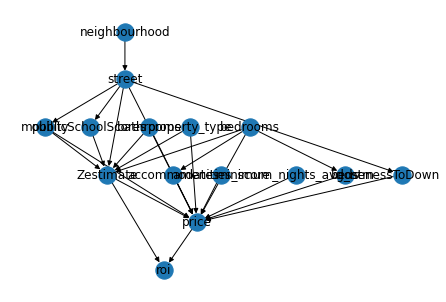

<Figure size 14400x7200 with 0 Axes>

In [13]:
import networkx as nx
import pydot

DAG_11 = nx.DiGraph()
DAG_11.add_edges_from(edges)
pos_11 = nx.nx_pydot.graphviz_layout(DAG_11, prog='dot')
nx.draw(DAG_11, pos=pos_11, with_labels=True)
plt.figure(figsize=(200,100))
plt.show()

In [14]:
def adjacencyMatrix(edges):
    df = pd.DataFrame(edges, columns =['source','target'], dtype = float) 
    df = pd.crosstab(df.source, df.target)
    idx = df.columns.union(df.index)
    df2 = df.reindex(index = idx, columns=idx, fill_value=0)
    df2.index.name = "source"
    df2 = df2.rename_axis('target')
    return df2

In [15]:
adjMat = adjacencyMatrix(edges)

In [16]:
# adjMat

In [17]:
data_discrete = data_discrete.astype(object)
model ={'adjmat':adjMat, 'model':graph}

model_update = bnlearn.parameter_learning.fit(model, data_discrete, verbose=1)

In [88]:
with open('mymodel.pickle', 'wb') as f:
    pickle.dump(model_update, f)

In [18]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

now = 2020-12-17 00:11:58.231171
date and time = 17/12/2020 00:11:58


In [19]:
labels ={}
for i in list(model_update['model'].nodes):
    labels[i] = model_update['model'].get_cpds(i).state_names[i]
    
    print(i," :",len(labels[i]))


amenities_score  : 3
bathrooms  : 5
bedrooms  : 3
Zestimate  : 3
neighbourhood  : 20
roi  : 3
price  : 3
minimum_nights_avg_ntm  : 3
publicSchoolScores  : 3
mobility  : 9
property_type  : 2
closenessToDowntown  : 3
accommodates  : 3
beds  : 3
street  : 147


In [20]:
params_amenities_score = torch.tensor(model_update['model'].get_cpds('amenities_score').values.T)
params_bathrooms = torch.tensor(model_update['model'].get_cpds('bathrooms').values.T)
params_bedrooms = torch.tensor(model_update['model'].get_cpds('bedrooms').values.T)
params_minimum_nights_avg_ntm = torch.tensor(model_update['model'].get_cpds('minimum_nights_avg_ntm').values.T)
params_property_type = torch.tensor(model_update['model'].get_cpds('property_type').values.T)
params_neighbourhood = torch.tensor(model_update['model'].get_cpds('neighbourhood').values.T)
params_accommodates = torch.tensor(model_update['model'].get_cpds('accommodates').values.T)
params_beds = torch.tensor(model_update['model'].get_cpds('beds').values.T)
params_closenessToDowntown = torch.tensor(model_update['model'].get_cpds('closenessToDowntown').values.T)
params_publicSchoolScores = torch.tensor(model_update['model'].get_cpds('publicSchoolScores').values.T)
params_Zestimate = torch.tensor(model_update['model'].get_cpds('Zestimate').values.T)
params_price = torch.tensor(model_update['model'].get_cpds('price').values.T)
params_roi = torch.tensor(model_update['model'].get_cpds('roi').values.T)
params_mobility = torch.tensor(model_update['model'].get_cpds('mobility').values.T)
params_street = torch.tensor(model_update['model'].get_cpds('street').values.T)

In [21]:
print("params_amenities_score \t\t\t",params_amenities_score.shape)
print("params_bathrooms \t\t\t",params_bathrooms.shape)
print("params_bedrooms \t\t\t",params_bedrooms.shape)
print("params_minimum_nights_avg_ntm \t\t",params_minimum_nights_avg_ntm.shape)
print("params_property_type \t\t\t",params_property_type.shape)
print("params_neighbourhood \t\t\t",params_neighbourhood.shape)

print("params_accommodates \t\t\t",params_accommodates.shape)
print("params_beds \t\t\t\t",params_beds.shape)

print("params_closenessToDowntown \t\t",params_closenessToDowntown.shape)
print("params_publicSchoolScores \t\t",params_publicSchoolScores.shape)
print("params_mobility \t\t\t",params_mobility.shape)
print("params_street \t\t\t\t",params_street.shape)
print("params_roi \t\t\t\t",params_roi.shape)
print("params_Zestimate \t\t\t",params_Zestimate.shape)
print("params_price \t\t\t\t",params_price.shape)

params_amenities_score 			 torch.Size([3])
params_bathrooms 			 torch.Size([5])
params_bedrooms 			 torch.Size([3])
params_minimum_nights_avg_ntm 		 torch.Size([3])
params_property_type 			 torch.Size([2])
params_neighbourhood 			 torch.Size([20])
params_accommodates 			 torch.Size([3, 3])
params_beds 				 torch.Size([3, 3])
params_closenessToDowntown 		 torch.Size([147, 3])
params_publicSchoolScores 		 torch.Size([147, 3])
params_mobility 			 torch.Size([147, 9])
params_street 				 torch.Size([20, 147])
params_roi 				 torch.Size([3, 3, 3])
params_Zestimate 			 torch.Size([147, 3, 2, 9, 3, 5, 3])
params_price 				 torch.Size([147, 2, 9, 3, 3, 3, 3, 5, 3, 3, 3, 3])


In [22]:
def pyroModel():
    amenities_score = pyro.sample('amenities_score', dist.Categorical(params_amenities_score))
    bathrooms = pyro.sample('bathrooms', dist.Categorical(params_bathrooms))
    bedrooms = pyro.sample('bedrooms', dist.Categorical(params_bedrooms))
    minimum_nights_avg_ntm = pyro.sample('minimum_nights_avg_ntm', dist.Categorical(params_minimum_nights_avg_ntm))
    property_type = pyro.sample('property_type', dist.Categorical(params_property_type))
    neighbourhood = pyro.sample('neighbourhood', dist.Categorical(params_neighbourhood))
    
    accommodates = pyro.sample('accommodates', dist.Categorical(params_accommodates[bedrooms]))
    beds = pyro.sample('beds', dist.Categorical(params_beds[bedrooms]))
    street = pyro.sample('street', dist.Categorical(params_street[neighbourhood]))
    closenessToDowntown = pyro.sample('closenessToDowntown', dist.Categorical(params_closenessToDowntown[street]))
    publicSchoolScores = pyro.sample('publicSchoolScores', dist.Categorical(params_publicSchoolScores[street]))
    mobility = pyro.sample('mobility', dist.Categorical(params_mobility[street]))
    
    Zestimate = pyro.sample('Zestimate',dist.Categorical(params_Zestimate[street][publicSchoolScores]
                                                         [property_type][mobility][bedrooms][bathrooms]))
    
    price = pyro.sample('price', dist.Categorical(params_price[street][property_type][mobility]
                                                  [minimum_nights_avg_ntm][closenessToDowntown][beds][bedrooms]
                                                  [bathrooms][amenities_score][accommodates][Zestimate]))
    roi = pyro.sample('roi', dist.Categorical(params_roi[price][Zestimate]))
    
    return(amenities_score,bathrooms,bedrooms,minimum_nights_avg_ntm,property_type,neighbourhood,
           accommodates,beds,closenessToDowntown,publicSchoolScores,street,mobility,
           Zestimate,price,roi)

In [23]:
def UsingDo(data,value):
    intervention_model = pyro.do(pyroModel, data={data: torch.tensor(value)})
    posterior = pyro.infer.Importance(intervention_model, num_samples=5000).run()
    marginal = EmpiricalMarginal(posterior,"roi")
    samples = [marginal().item() for _ in range(1000)]
    
    unique, counts = np.unique(samples, return_counts=True)
    prob = counts[1]/sum(counts)
  
    return(prob)

In [24]:
def UsingConditional(data,value):
    conditioned_model = pyro.condition(pyroModel, data={data: torch.tensor(value)})
    posterior = pyro.infer.Importance(conditioned_model, num_samples=5000).run()
    marginal = EmpiricalMarginal(posterior,"roi")
    samples = [marginal().item() for _ in range(1000)]
    
    unique, counts = np.unique(samples, return_counts=True)
    prob = counts[1]/sum(counts)
  
    return(prob)

In [25]:
pyro.set_rng_seed(10)
#Probability of ROI fixing the bedrooms using do operator
for i in range(len(labels['bedrooms'])):
    val = UsingDo('bedrooms', i)
    print(labels['bedrooms'][i],':',val)
print()
pyro.set_rng_seed(10)
for i in range(len(labels['bedrooms'])):
    val = UsingConditional('bedrooms', i)
    print(labels['bedrooms'][i],':',val)

(1,2] : 0.323
(2,6] : 0.329
[0,1] : 0.327

(1,2] : 0.348
(2,6] : 0.379
[0,1] : 0.329


3 - 5 rooms give best roi

In [57]:
pyro.set_rng_seed(10)
#Probability of ROI fixing the bedrooms using do operator
for i in range(len(labels['bathrooms'])):
    val = UsingDo('bathrooms', i)
    print(labels['bathrooms'][i],':',val)
print()
pyro.set_rng_seed(10)
for i in range(len(labels['bathrooms'])):
    val = UsingConditional('bathrooms', i)
    print(labels['bathrooms'][i],':',val)

1.0 : 0.323
1.5 : 0.329
2.0 : 0.326
2.5 : 0.325
3.0 : 0.341

1.0 : 0.347
1.5 : 0.379
2.0 : 0.331
2.5 : 0.327
3.0 : 0.298


In [58]:
pyro.set_rng_seed(10)
#Probability of ROI fixing the bedrooms using do operator
for i in range(len(labels['amenities_score'])):
    val = UsingDo('amenities_score', i)
    print(labels['amenities_score'][i],':',val)
print()
pyro.set_rng_seed(10)
for i in range(len(labels['amenities_score'])):
    val = UsingConditional('amenities_score', i)
    print(labels['amenities_score'][i],':',val)

(30,33] : 0.323
(33,52] : 0.329
[12,30] : 0.326

(30,33] : 0.348
(33,52] : 0.377
[12,30] : 0.331


In [59]:
pyro.set_rng_seed(10)
#Probability of ROI fixing the bedrooms using do operator
for i in range(len(labels['neighbourhood'])):
    val = UsingDo('neighbourhood', i)
    print(labels['neighbourhood'][i],':',val)
print()
pyro.set_rng_seed(10)
for i in range(len(labels['neighbourhood'])):
    val = UsingConditional('neighbourhood', i)
    print(labels['neighbourhood'][i],':',val)

Allston : 0.323
Back Bay : 0.33
Bay Village : 0.326
Beacon Hill : 0.326
Brighton : 0.34
Charlestown : 0.318
Chinatown : 0.339
Dorchester : 0.324
Downtown : 0.339
East Boston : 0.344
Fenway : 0.323
Hyde Park : 0.303
Jamaica Plain : 0.332
Mission Hill : 0.33
North End : 0.326
Roslindale : 0.335
Roxbury : 0.357
South Boston : 0.318
South End : 0.378
West Roxbury : 0.342

Allston : 0.349
Back Bay : 0.38
Bay Village : 0.33
Beacon Hill : 0.327
Brighton : 0.297
Charlestown : 0.321
Chinatown : 0.337
Dorchester : 0.337
Downtown : 0.324
East Boston : 0.354
Fenway : 0.332
Hyde Park : 0.351
Jamaica Plain : 0.34
Mission Hill : 0.32
North End : 0.307
Roslindale : 0.324
Roxbury : 0.37
South Boston : 0.368
South End : 0.322
West Roxbury : 0.325


In [60]:
pyro.set_rng_seed(10)
#Probability of ROI fixing the bedrooms using do operator
for i in range(len(labels['closenessToDowntown'])):
    val = UsingDo('closenessToDowntown', i)
    print(labels['closenessToDowntown'][i],':',val)
print()
pyro.set_rng_seed(10)
for i in range(len(labels['closenessToDowntown'])):
    val = UsingConditional('closenessToDowntown', i)
    print(labels['closenessToDowntown'][i],':',val)

(2400.33,4704.33] : 0.323
(4704.33,19715] : 0.329
[898,2400.33] : 0.326

(2400.33,4704.33] : 0.371
(4704.33,19715] : 0.335
[898,2400.33] : 0.33


In [61]:
pyro.set_rng_seed(10)
#Probability of ROI fixing the bedrooms using do operator
for i in range(len(labels['Zestimate'])):
    val = UsingDo('Zestimate', i)
    print(labels['Zestimate'][i],':',val)
print()
pyro.set_rng_seed(10)
for i in range(len(labels['Zestimate'])):
    val = UsingConditional('Zestimate', i)
    print(labels['Zestimate'][i],':',val)

(544583,870941] : 0.34
(870941,1.14825e+07] : 0.281
[165887,544583] : 0.383

(544583,870941] : 0.348
(870941,1.14825e+07] : 0.291
[165887,544583] : 0.384


In [62]:
pyro.set_rng_seed(10)
#Probability of ROI fixing the bedrooms using do operator
for i in range(len(labels['mobility'])):
    val = UsingDo('mobility', i)
    print(labels['mobility'][i],':',val)
print()
pyro.set_rng_seed(10)
for i in range(len(labels['mobility'])):
    val = UsingConditional('mobility', i)
    print(labels['mobility'][i],':',val)

2.0 : 0.323
2.3333333333333335 : 0.329
2.6666666666666665 : 0.326
3.0 : 0.325
3.3333333333333335 : 0.341
3.6666666666666665 : 0.317
4.0 : 0.34
4.333333333333333 : 0.324
4.666666666666667 : 0.337

2.0 : 0.346
2.3333333333333335 : 0.337
2.6666666666666665 : 0.326
3.0 : 0.364
3.3333333333333335 : 0.34
3.6666666666666665 : 0.325
4.0 : 0.339
4.333333333333333 : 0.333
4.666666666666667 : 0.314


In [63]:
pyro.set_rng_seed(10)
max_ = 0
#Probability of ROI fixing the bedrooms using do operator
for i in range(len(labels['street'])):
    val = UsingDo('street', i)
    print(labels['street'][i],':',val)
    if val>max_:
        max_ = val
print(max_)
print()
pyro.set_rng_seed(10)
max_=0
for i in range(len(labels['street'])):
    val = UsingConditional('street', i)
    print(labels['street'][i],':',val)
    if val>max_:
        max_ = val
print(max_)

Alameda Road : 0.323
Appleton Street : 0.328
Argyle Street : 0.326
Armington Street : 0.325
Ashburton Place : 0.339
Beacon Street : 0.318
Beech Street : 0.34
Bellingham Place : 0.324
Bennington Street : 0.337
Blue Hill Avenue : 0.345
Bolton Street : 0.324
Bond Street : 0.304
Boston Street : 0.331
Bostonia Avenue : 0.331
Bremen Street : 0.325
Brent Street : 0.334
Brighton Avenue : 0.357
Brighton Street : 0.319
Brimmer Street : 0.377
Bromfield Street : 0.343
Brookline Avenue : 0.312
Brookside Avenue : 0.33
Bunker Hill Street : 0.358
Business Street : 0.328
Buttonwood Street : 0.342
Byron Street : 0.321
Cedar Lane Way : 0.342
Centre Street : 0.332
Charles Street : 0.337
Charles Street South : 0.319
Chelsea Street : 0.361
Clive Street : 0.33
Colburn Street : 0.335
Columbia Road : 0.342
Columbus Avenue : 0.339
Commonwealth Avenue : 0.342
Commonwealth Avenue Frontage Road Wb : 0.345
Concord Square : 0.32
Corey Road : 0.344
Cowing Street : 0.351
Crawford Street : 0.332
Cross Street : 0.332
D 

In [84]:
new_df = pd.DataFrame(columns=['neighbourhood','bedrooms','property_type','ROI_simple','ROI_complex','causal_effect'])
ind = 0
for i in range(len(params_neighbourhood)):
    print(i)
    intervention_model_simple = pyro.do(pyroModel, data={'neighbourhood': torch.tensor(i)} )
    posterior_simple = pyro.infer.Importance(intervention_model_simple, num_samples=5000).run()
    marginal_simple = EmpiricalMarginal(posterior_simple,"roi")
    samples_simple = [marginal_simple().item() for _ in range(1000)]
    unique, counts = np.unique(samples_simple, return_counts=True)
    roi1 = counts[1]/sum(counts)
    for j in range(len(params_bedrooms)):
        for k in range(len(params_property_type)):
#             print("i = ",i,", j = ",j,", k = ",k)
            
            
            
            intervention_model_complex = pyro.do(pyroModel, data={'neighbourhood': torch.tensor(i),'property_type':torch.tensor(k),\
                                                                'bedrooms': torch.tensor(j)} )
            posterior_complex = pyro.infer.Importance(intervention_model_complex, num_samples=5000).run()
            marginal_complex = EmpiricalMarginal(posterior_complex,"roi")
            samples_complex = [marginal_complex().item() for _ in range(1000)]
            unique, counts = np.unique(samples_complex, return_counts=True)
            roi2 = counts[1]/sum(counts)

            new_df.loc[ind] = [labels['neighbourhood'][i], labels['bedrooms'][j], labels['property_type'][k] , roi1, roi2, abs(roi1-roi2)]
            ind+=1


new_df

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


,neighbourhood,bedrooms,property_type,ROI_simple,ROI_complex,causal_effect
0,Allston,"(1,2]",Apartment,0.325,0.329,0.004
1,Allston,"(1,2]",Condominium,0.325,0.320,0.005
2,Allston,"(2,6]",Apartment,0.325,0.333,0.008
3,Allston,"(2,6]",Condominium,0.325,0.349,0.024
4,Allston,"[0,1]",Apartment,0.325,0.314,0.011
...,...,...,...,...,...,...
115,West Roxbury,"(1,2]",Condominium,0.357,0.314,0.043
116,West Roxbury,"(2,6]",Apartment,0.357,0.321,0.036
117,West Roxbury,"(2,6]",Condominium,0.357,0.339,0.018
118,West Roxbury,"[0,1]",Apartment,0.357,0.297,0.060


In [85]:
print(new_df[new_df.ROI_simple == new_df.ROI_simple.max()])

    neighbourhood bedrooms property_type  ROI_simple  ROI_complex  \
96        Roxbury    (1,2]     Apartment       0.369        0.303   
97        Roxbury    (1,2]   Condominium       0.369        0.344   
98        Roxbury    (2,6]     Apartment       0.369        0.353   
99        Roxbury    (2,6]   Condominium       0.369        0.328   
100       Roxbury    [0,1]     Apartment       0.369        0.349   
101       Roxbury    [0,1]   Condominium       0.369        0.324   

     causal_effect  
96           0.066  
97           0.025  
98           0.016  
99           0.041  
100          0.020  
101          0.045  


In [86]:
print(new_df[new_df.ROI_complex == new_df.ROI_complex.max()])

   neighbourhood bedrooms property_type  ROI_simple  ROI_complex  \
46    Dorchester    [0,1]     Apartment       0.341        0.375   

    causal_effect  
46          0.034  


In [87]:
print(new_df[new_df.causal_effect == new_df.causal_effect.max()])

   neighbourhood bedrooms property_type  ROI_simple  ROI_complex  \
96       Roxbury    (1,2]     Apartment       0.369        0.303   

    causal_effect  
96          0.066  


In [102]:
roisimple = list(new_df[new_df.ROI_simple == new_df.ROI_simple.max()]['ROI_simple'])
roicomplex = list(new_df[new_df.ROI_simple == new_df.ROI_simple.max()]['ROI_complex'])
causaleffect = roi

<BarContainer object of 6 artists>

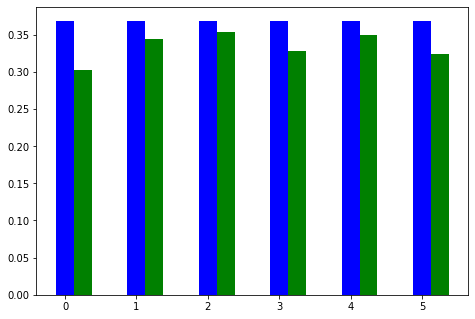

In [105]:
X = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, roisimple, color = 'b', width = 0.25)
ax.bar(X + 0.25, roicomplex, color = 'g', width = 0.25)
# ax.set_xticks(X,('(1,2]', '(1,2]', '(2,6]', '(2,6]', '[0,1]', '[0,1]'))

<BarContainer object of 6 artists>

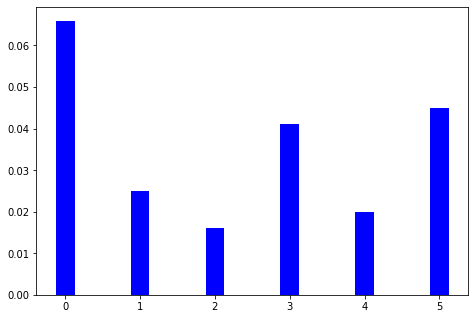

In [103]:
X = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, causaleffectsaleffect, color = 'b', width = 0.25)

<BarContainer object of 2 artists>

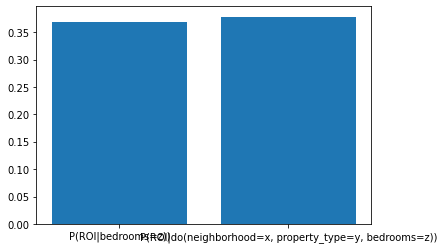

In [80]:
plt.bar(x = ['P(ROI|bedrooms=z))','P(ROI|do(neighborhood=x, property_type=y, bedrooms=z))'],height = [0.368,0.378])

In [106]:

pyro.set_rng_seed(10)
new_df2 = pd.DataFrame(columns=['bedrooms', 'simple_ROI','complex_ROI','Causal Effect'])
for i in range(len(params_bedrooms)):
    intervention_model_simple = pyro.do(pyroModel, data={'bedrooms': torch.tensor(i)})
    posterior_simple = pyro.infer.Importance(intervention_model_simple, num_samples=5000).run()
    marginal_simple = EmpiricalMarginal(posterior_simple,"roi")
    samples_simple = [marginal_simple().item() for _ in range(1000)]
    unique, counts = np.unique(samples_simple, return_counts=True)
    roi_neigh1 = counts[1]/sum(counts)


    intervention_model_complex = pyro.do(pyroModel, data={'neighbourhood': torch.tensor(3),'amenities_score':torch.tensor(1),\
                                                                'mobility':torch.tensor(4) , \
                                                                'publicSchoolScores':torch.tensor(0),'property_type':torch.tensor(0),\
                                                                'closenessToDowntown': torch.tensor(1), 'bedrooms': torch.tensor(i),\
                                                                'bathrooms': torch.tensor(4)} )
    posterior_complex = pyro.infer.Importance(intervention_model_complex, num_samples=5000).run()
    marginal_complex = EmpiricalMarginal(posterior_complex,"roi")
    samples_complex = [marginal_complex().item() for _ in range(1000)]
    unique, counts = np.unique(samples_complex, return_counts=True)
    roi_neigh2 = counts[1]/sum(counts)

    new_df2.loc[i] = [labels['bedrooms'][i] , roi_neigh1, roi_neigh2, abs(roi_neigh2-roi_neigh1)]
new_df2

,bedrooms,simple_ROI,complex_ROI,Causal Effect
0,"(1,2]",0.323,0.326,0.003
1,"(2,6]",0.326,0.325,0.001
2,"[0,1]",0.341,0.318,0.023


In [111]:
roisimple = list(new_df2['simple_ROI'])
roicomplex = list(new_df2['complex_ROI'])
causaleffect = list(new_df2['Causal Effect'])

<BarContainer object of 3 artists>

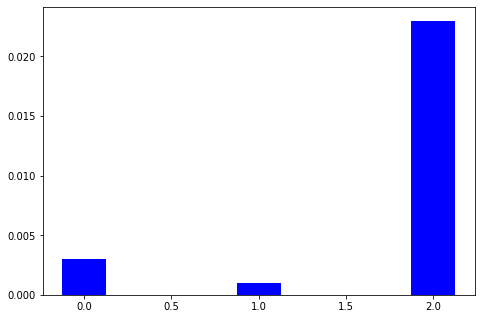

In [117]:
X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, causaleffect, color = 'b', width = 0.25)

In [65]:
new_df = pd.DataFrame(columns=['street','bedrooms','property_type','ROI'])
ind = 0
for i in range(len(params_street)):
    for j in range(len(params_bedrooms)):
        for k in range(len(params_property_type)):
#             print("i = ",i,", j = ",j,", k = ",k)
            intervention_model_complex = pyro.do(pyroModel, data={'street': torch.tensor(i),'amenities_score':torch.tensor(1),\
                                                                'mobility':torch.tensor(4) , \
                                                                'publicSchoolScores':torch.tensor(0),'property_type':torch.tensor(k),\
                                                                'closenessToDowntown': torch.tensor(1), 'bedrooms': torch.tensor(j),\
                                                                'bathrooms': torch.tensor(4)} )
            posterior_complex = pyro.infer.Importance(intervention_model_complex, num_samples=5000).run()
            marginal_complex = EmpiricalMarginal(posterior_complex,"roi")
            samples_complex = [marginal_complex().item() for _ in range(1000)]
            unique, counts = np.unique(samples_complex, return_counts=True)
            roi = counts[1]/sum(counts)

            new_df.loc[ind] = [labels['street'][i], labels['bedrooms'][j], labels['property_type'][k] , roi]
            ind+=1


new_df

,street,bedrooms,property_type,ROI
0,Alameda Road,"(1,2]",Apartment,0.323
1,Alameda Road,"(1,2]",Condominium,0.329
2,Alameda Road,"(2,6]",Apartment,0.326
3,Alameda Road,"(2,6]",Condominium,0.325
4,Alameda Road,"[0,1]",Apartment,0.341
...,...,...,...,...
115,Brookline Avenue,"(1,2]",Condominium,0.338
116,Brookline Avenue,"(2,6]",Apartment,0.334
117,Brookline Avenue,"(2,6]",Condominium,0.363
118,Brookline Avenue,"[0,1]",Apartment,0.301


In [66]:
print(new_df[new_df.ROI == new_df.ROI.max()])

              street bedrooms property_type    ROI
18  Armington Street    (1,2]     Apartment  0.378


In [118]:
labels['neighbourhood'][3]

'Beacon Hill'